# Importing Libraries

In [1]:
import numpy as np # linear algebra
import os
from tqdm import tqdm
from tensorflow import keras
import cv2
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow
from keras.applications.vgg19 import VGG19
from keras.layers import Dense, Flatten
from keras.models import Model
import matplotlib.pyplot as plt

# Data Processing

In [2]:
path = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset'

In [3]:
labels = ['Arborio','Basmati','Ipsala','Jasmine','Karacadag']

In [4]:
print("pre-processing data\n")

image_data=[]
label_data=[]
image_size=150

for i in labels:
    data_path=os.path.join("/kaggle/input/rice-image-dataset/","Rice_Image_Dataset",i)
    for m in tqdm(os.listdir(data_path)):
        image=cv2.imread(os.path.join(data_path,m))
        image=cv2.resize(image,(image_size,image_size))
        
        image_data.append(image)
        label_data.append(i)
        
image_data=np.array(image_data)
label_data=np.array(label_data)

pre-processing data



100%|██████████| 15000/15000 [01:43<00:00, 144.56it/s]


# Data Splitting

In [5]:
image_data,label_data=shuffle(image_data,label_data,random_state=42)
X_train,X_test,Y_train,Y_test=train_test_split(image_data,label_data,test_size=0.2,random_state=42)

# To categorical

In [6]:
train_label_data_new=[]
test_label_data_new=[]
for n in Y_train:
    train_label_data_new.append(labels.index(n))
Y_train=train_label_data_new
Y_train=to_categorical(Y_train)
    
for n in Y_test:
    test_label_data_new.append(labels.index(n))
Y_test=test_label_data_new
Y_test=to_categorical(Y_test)

# VGG19 Model

In [7]:
vgg = VGG19(input_shape=(150,150,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

prediction = Dense(5, activation='softmax')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,065,349 (76.54 MB)

 Trainable params: 40,965 (160.02 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [8]:
modelvgg.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)

In [9]:
history=modelvgg.fit(X_train,Y_train,
 epochs=3,
 batch_size= 10,
 validation_data=(X_test,Y_test), callbacks=callback)

Epoch 1/3
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 308s 50ms/step - auc: 0.9808 - loss: 0.6967 - val_auc: 0.9829 - val_loss: 1.0525
Epoch 2/3
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 304s 51ms/step - auc: 0.9922 - loss: 0.4873 - val_auc: 0.9946 - val_loss: 0.3312
Epoch 3/3
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 303s 50ms/step - auc: 0.9950 - loss: 0.3758 - val_auc: 0.9924 - val_loss: 0.5840


# Accuracy and Loss

In [10]:
loss, accuracy = modelvgg.evaluate(X_train, Y_train)
print("Train Loss: ", loss)
print("Train Accuracy: ", accuracy)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 161s 80ms/step - auc: 0.9957 - loss: 0.2292
Train Loss:  0.24674953520298004
Train Accuracy:  0.9955251216888428


In [11]:
loss, accuracy = modelvgg.evaluate(X_test, Y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 96ms/step - auc: 0.9945 - loss: 0.3290
Test Loss:  0.3311808407306671
Test Accuracy:  0.9946154952049255


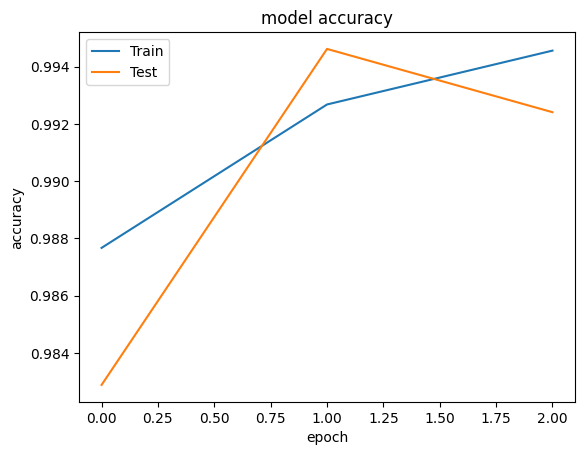

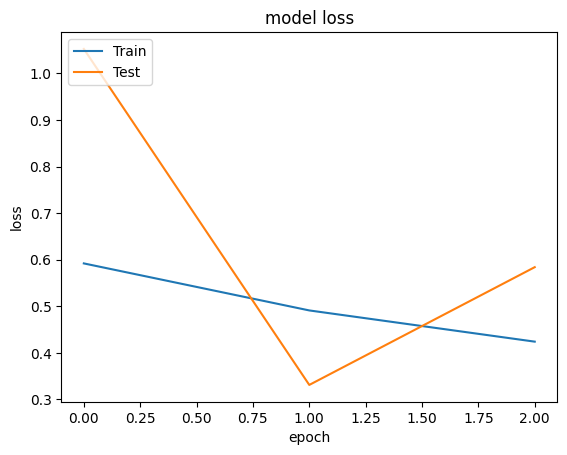

In [12]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Confusion Matrix and Classification Report

In [13]:
predictions = modelvgg.predict(X_test)
y_pred=np.argmax(predictions, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
display_c_m = ConfusionMatrixDisplay(cm, display_labels=labels)

469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 79ms/step
[[3068    0    2    0    5]
 [   0 2962    0    7    0]
 [   1    0 2954    1    0]
 [  21   63   18 2882    0]
 [  36    0    0    0 2980]]


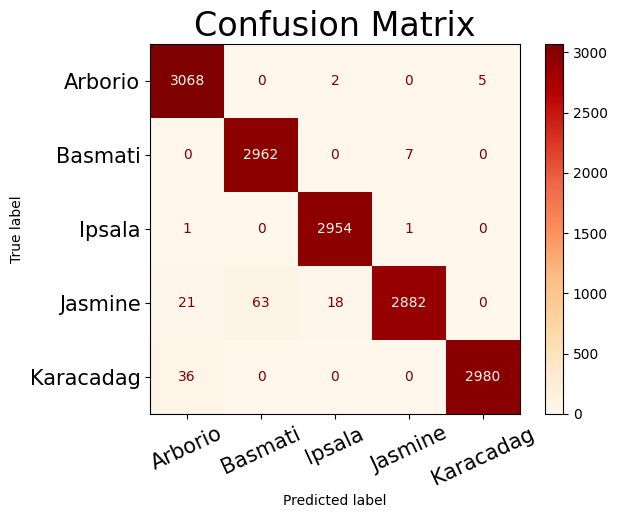

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3075
           1       0.98      1.00      0.99      2969
           2       0.99      1.00      1.00      2956
           3       1.00      0.97      0.98      2984
           4       1.00      0.99      0.99      3016

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



In [14]:
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Confusion Matrix', fontsize=24)
plt.show()
print(classification_report(y_test, y_pred))